# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GrCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGrCPlasticity10'
simulation_time = 10
analysis_time = 100.0
analysis_step = 0.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 123
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['grclayer']['density_of_neurons'] = 4.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['grclayer']['cm'] = 2.0e-12
simulation.config_options['grclayer']['grest'] = 0.2e-9
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgrcsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells'] = 500.0
simulation.config_options['mfgrcsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 1.3e-11
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 1.35e-11
simulation.config_options['mfgrcsynapsis']['weight_recording'] = True
simulation.config_options['mfgrcsynapsis']['weight_normalization'] = False
#simulation.config_options['mfgrcsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgrcsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgrcsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgrcsynapsis']['minus_plus_ratio'] = 1.23
simulation.config_options['grclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgrcsynapsis']['max_weight'] = 3.63e-10

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'grclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'grclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-06-05 23:59:48,306 - P11757 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 10s
2018-06-05 23:59:48,325 - P11757 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-06-05 23:59:48,402 - P11757 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-06-05 23:59:48,403 - P11757 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGrCPlasticity10
2018-06-05 23:59:48,447 - P11757 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-06-05 23:59:48,450 - P11757 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-06-05 23:59:48,468 - P11757 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 134
2018-06-05 23:59:48,470 - P11757 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
2018-06-05 23:59:48,472 - P11757 - MemTotal:87M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in laye

Visualize the simulation or only run it.

In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(8,4))
    axis = fig.add_subplot(1,2,1)
    line,= axis.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('MI & Hit evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    axis2 = fig.add_subplot(1,2,2)
    target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

2018-06-05 23:59:48,896 - P11757 - MemTotal:152M - Simulation - INFO: Running the simulation from 0.0s until time 10s
2018-06-05 23:59:48,920 - P11757 - MemTotal:152M - Simulation - DEBUG: Running the simulation 0.136s until 0.136s
2018-06-05 23:59:49,117 - P11757 - MemTotal:155M - Simulation - DEBUG: Simulation time is 0.19510602951 seconds. Real-time rate: 0.697056878976066
2018-06-05 23:59:49,135 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the simulation 0.035s until 0.171s
2018-06-05 23:59:49,182 - P11757 - MemTotal:155M - Simulation - DEBUG: Simulation time is 0.0452580451965 seconds. Real-time rate: 0.773343166900214
2018-06-05 23:59:49,202 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the simulation 0.028999999999999998s until 0.2s
2018-06-05 23:59:49,253 - P11757 - MemTotal:155M - Simulation - DEBUG: Simulation time is 0.0493159294128 seconds. Real-time rate: 0.588045289732458
2018-06-05 23:59:49,275 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the

2018-06-06 00:00:01,052 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the simulation 0.5010000000000003s until 7.706000000000001s
2018-06-06 00:00:01,856 - P11757 - MemTotal:155M - Simulation - DEBUG: Simulation time is 0.8019759655 seconds. Real-time rate: 0.6247070006489821
2018-06-06 00:00:01,873 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the simulation 0.07800000000000029s until 7.784000000000002s
2018-06-06 00:00:01,982 - P11757 - MemTotal:155M - Simulation - DEBUG: Simulation time is 0.107278108597 seconds. Real-time rate: 0.727082170074032
2018-06-06 00:00:01,999 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the simulation 0.9500000000000002s until 8.734000000000002s
2018-06-06 00:00:03,665 - P11757 - MemTotal:155M - Simulation - DEBUG: Simulation time is 1.66452002525 seconds. Real-time rate: 0.5707350981586631
2018-06-06 00:00:03,695 - P11757 - MemTotal:155M - Simulation - DEBUG: Running the simulation 1.2659999999999982s until 10.0s
2018-06-06 00

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-06-06 00:00:06,171 - P11757 - MemTotal:174M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5


## GrC activity analysis

Show the GrC acticity rasterplot

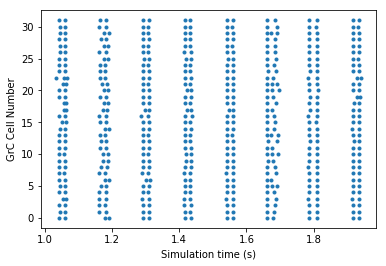

In [16]:
init_time = simulation.current_time - 9.0
end_time = simulation.current_time - 8.0
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure()
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GrC Cell Number')
plt.xlabel('Simulation time (s)')
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
pattern_id = 0
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)
plt.show()

Calculate the average firing frequency of each granular cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.20011718750000002 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

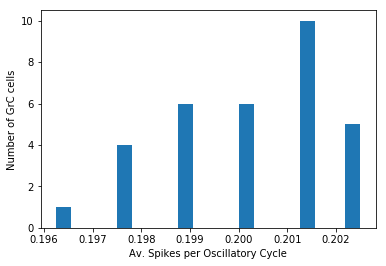

In [10]:
init_time = simulation.current_time - 100.0
end_time = simulation.current_time
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / ((end_time-init_time)*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GrC

0.0


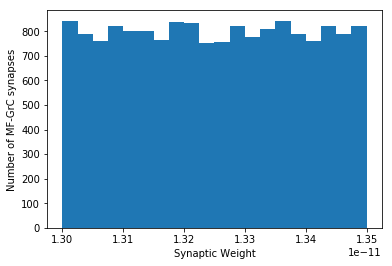

10.0


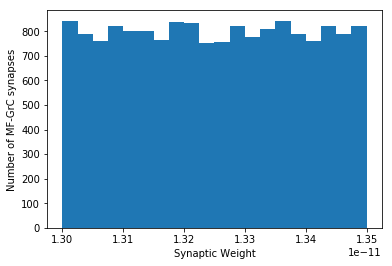

Number of active synapses MF-GrC: 15995
Weight sum histogram MF-GrC: 15995


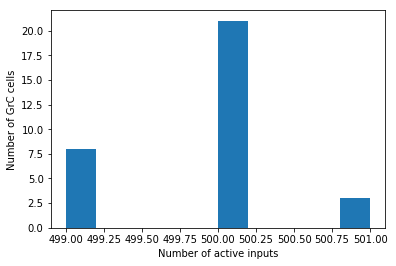

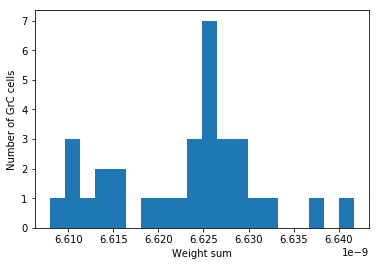

In [11]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
#weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
time_list,_,weight_list =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=simulation_time)
for idx,time in enumerate(time_list):
    print time
    weight=weight_list[:,idx]
    plt.figure()
    plt.hist(weight, bins=20)
    plt.ylabel('Number of MF-GrC synapses')
    plt.xlabel('Synaptic Weight')
    plt.show()
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 1633


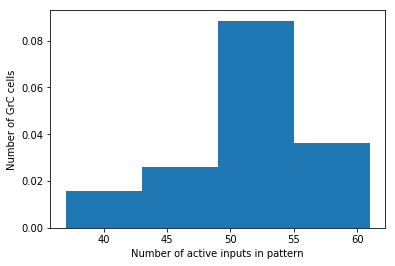

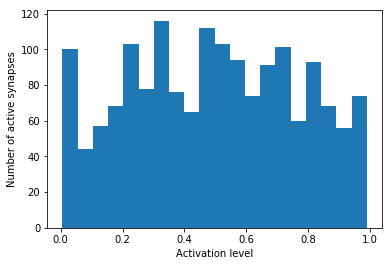

In [12]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
    plt.figure()
    n,_,_=plt.hist(number_of_active_inputs_in_pattern, bins=4, density=True)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

## GoC activity analysis

Show the GoC acticity rasterplot

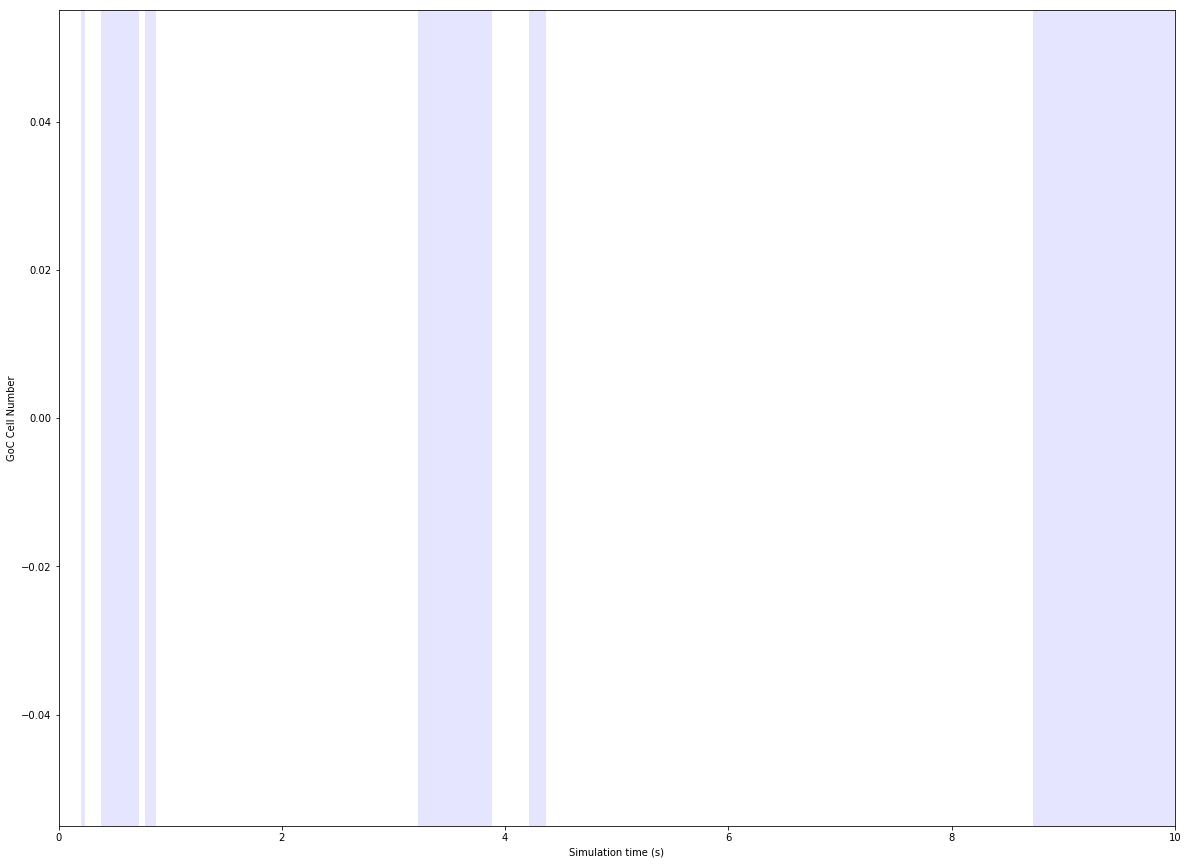

In [13]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: nan Hz


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

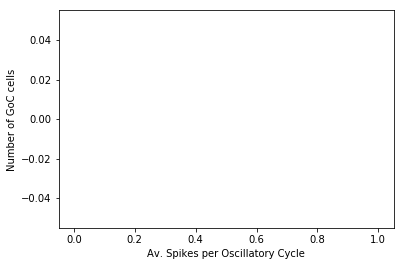

In [14]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between GrC and GoC

In [15]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of GrC-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram GrC-GoC:',numpy.count_nonzero(active_synapses)

KeyError: 'grcgocsynapsis'

Plot the histogram of non-zero weights between MF and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## GrC-GoC weight analysis

Plot the GrC-GoC weight as a function of the number of MF-GrC synapses in pattern

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==6
# Obtain the list of active GrC inputs
mfgrc_target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
mfgrc_source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
mfgrc_weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
mfgrc_max_weight = numpy.max(mfgrc_weight)
mfgrc_active_synapses = mfgrc_weight>mfgrc_max_weight*0.0
mfgrc_number_of_active_inputs = numpy.bincount(mfgrc_target_cell_index[mfgrc_active_synapses])
# Obtain the list of GrC active inputs in included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgrc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
included_and_active = numpy.logical_and(included_in_pattern,mfgrc_active_synapses)
number_of_active_inputs_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(number_of_active_inputs_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Number of active MF inputs')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs MFs in pattern')

# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgrc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")

# Calculate the normalized activation levels
normalized_activation = mfgrc_weight[included_in_pattern]*simulation.pattern_generator.pattern_activation[pattern_id][yindex]
input_conductance_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],weights=normalized_activation,minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.subplot(1,2,2)
plt.plot(input_conductance_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Input Conductance in Pattern')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs Pattern input conductance')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==0
grcgoc_max_weight = numpy.max(grcgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(grcgoc_weight>grcgoc_max_weight*0.95,target_cell_index)
target_count = numpy.bincount(grcgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(grcgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='grclayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GrC cells')

Analyze the firing pattern of the selected GrCs and GoCs

In [ ]:
oscillation_frequency = 8.0
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
grc_time,grc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
grc_selected_spikes = numpy.isin(grc_cell,numpy.unique(grcgoc_source_cell_index[selected_synapses]))
cell_id = grc_cell[grc_selected_spikes]
sel_time = grc_time[grc_selected_spikes]
grc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(grc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GrCs')
plt.ylabel('Number of GrC Spikes')
plt.xlabel('Firing phase (s)')
goc_time,goc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
goc_selected_spikes = numpy.isin(goc_cell,numpy.unique(grcgoc_target_cell_index[selected_synapses]))
cell_id = goc_cell[goc_selected_spikes]
sel_time = goc_time[goc_selected_spikes]
goc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.subplot(1,2,2)
plt.hist(goc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GoCs')
plt.ylabel('Number of GoC Spikes')
plt.xlabel('Firing phase (s)')

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

In [ ]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [ ]:
simulation.analyze_av_MI()

In [ ]:
simulation.analyze_Hits_Top()